# Post success times
<a id='top'></a>

Inspect post success depending on time of day. To compare usage trends, two subsamples are shown on the histogram - before and after national lockdowns

## Set up

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.abspath(''), ".."))
from datetime import datetime
from modules import PushshiftAPI, RedditAPI, DataContext
from modules import load_posts, plot_submission_time_histogram

## Subreddit name and dates

In [2]:
# subreddit to analyse
subreddit_name = "skyrim"

# date range to download
daterange = [
    datetime.utcnow().timestamp(),
    datetime(2020, 1, 1, 0, 0, 0).timestamp(),
]

# if the posts are not in the database they will be downloaded
# set this to "True" to update them
update_posts = False

## Download the posts if needed

This might take some time depending on the subreddit's popularity and the date range specified above.

In [3]:
with DataContext() as context:
    posts = context.select_posts(subreddit_name=subreddit_name)

if update_posts or len(posts) == 0:
    load_posts(subreddit_name, daterange, PushshiftAPI(), RedditAPI(), progress=True)

## Plot the results

This plot shows 2020 results

Fetched 35461 posts.


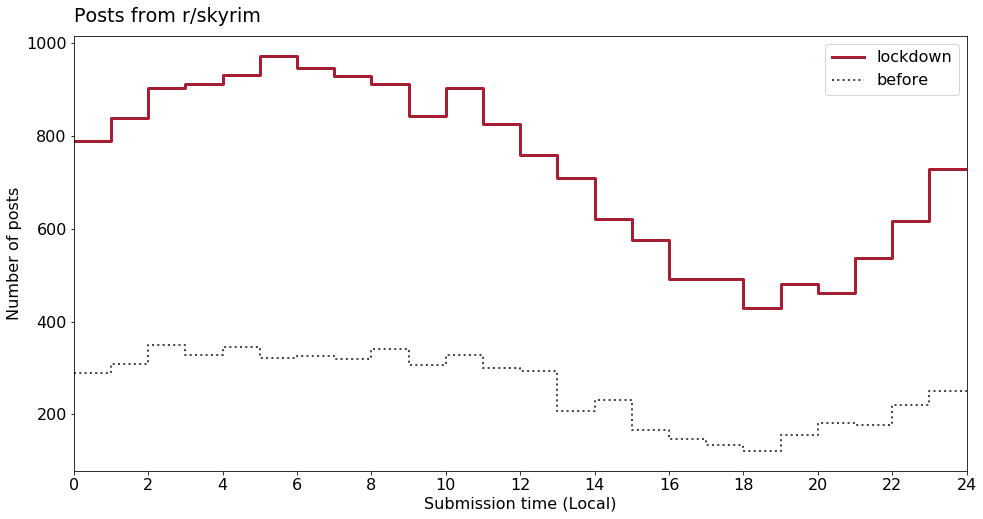

In [7]:
with DataContext() as context:
    posts = context.select_posts(subreddit_name=subreddit_name, include_removed=False)

print(f"Fetched {len(posts)} posts.")

f, ax = plot_submission_time_histogram(f"Posts from r/{subreddit_name}", average_method="mean", metric="post_number", posts=posts, success_score=100, utc=False, figsize=(16,8))